<a href="https://colab.research.google.com/github/epate2000/BSAN-6070-CA-05/blob/main/Python_Project_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Executive Summary**

The various analyses found in this report brings to light the problem of credit card fraud in the United States and includes specifics on where fraud is occurring the most, the demographics of the people being scammed, as well as the category of fraud. With this information we aimed to answer the the questions, who is most likely to fall victim to credit card fraud, where, and why. Once we discovered that credit card fraud related to online shopping was such a large segment of all the fraud happening in the US, we knew that this is what we needed to focus on.

However, before we could begin analyzing our data, we had to prepare it first. in order to answer who was most likely to experience credit card fraud, we wanted to identify the specific characteristic of age. That however would be impossible to visualize using just a date of birth. For this reason, we utilized various pandas functions to derive the age of each individual of our dataset, and segment them into bins of different age ranges to most effectively visualize our data. We chose to segment them into bins of ten, ranging from the minimum age of 20 to the maximum age of 98. We chose this over a more conventional "teen", "young adult", "adult", etc. since those categories can be subjective and we wanted to be as clear as possible as to who is most likely to experience fraud. From our data, we realized that people aged 50-60 years old were the most likely to run into credit card fraud.

After discerning that, we addressed the question of "where are these people running into fraud the most?" Through our visualizations further down this report, we found that it was through online shopping and internet misc took up 42.2% of fraud out of our sample.

Once online shopping was going to be our focus, we then needed to find where exactly in the U.S. fraud was happening. This ended up being New York, and even more specifically, Camden.

After conducting our analyses based on a variety of factors, we ended up coming to the conclusion that we should find a way to appeal to and protect 50-60 year olds that frequently online shop.

As a compnay still in its infancy, some valuable information that should be noted for establishing a headquarters or knowing who to market our services to would be individuals 50-50 years of age in New York. Since we know that primarily these individuals encounter fraud on the web, we should advertise them through online places. Furthermore, we believe that developing a widget/extension that could parse through a database of "sketchy" websites whenever they are shopping and notifity them when the website they are currently shopping on has been flagged could also be a great start towards our business.





#**Introduction**

We are Fraud Fighters, a cyber security company specializing in combatting credit card fraud. This report seeks to highlight the significant presence of credit card fraud in online settings and to offer solutions
to this growing concern. As Co-CEO's of the company, we live by our motto, "Collecting Fraudster Tears Since 2022".

By the end of this report, we will answer who is most likely to encounter credit card fraud, where they are located. how they got themselves into that situation, and offer solutions to our findings.

Answering these questions will play a huge role how we would want to roll out our company in the near future. If we are careless and don't analyze the market we are trying to get into prior to starting, we are bound to fail.



#**Credit Card Fraud**

**BSAN 6030 - Programming for Data Analytics**

Jeremy Law, Edward Pate



College of Business Administration

Loyola Marymount University

jlaw7@lion.lmu.edu, edward.pate@lmu.edu






#**Main Content and Analysis**



##***Methodology***

We utilized Python and its Numpy, Pandas, and Matplotlib features to make the visualizations you will soon see possible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Our dataset from kaggle was a 55,718 row random sample dataset taken from a larger dataset of over 1 million rows generated for the use of projects. This means that the data isn't based on anything real. Unfortunately, this means the insights made from this report won't have the same validity compared to a dataset created from webscraping or a proper survey. That being said, the project still serves its purpose of portraying our ability to articulate data to tell a story. As a result, we took the 2145 fradulent transactions and categorized them in several different ways to form our various analyses. Naturally, the 2145 cases of fraud are what we will be focusing on in this report. As such, we took only the fraud cases from the original fraudTest.csv file used them to make a new csv file named fraud.csv.

In [ ]:
df = pd.read_csv('fraud.csv')

In [ ]:
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  2145 non-null   object 
 1   cc_num                 2145 non-null   float64
 2   merchant               2145 non-null   object 
 3   category               2145 non-null   object 
 4   amt                    2145 non-null   float64
 5   first                  2145 non-null   object 
 6   last                   2145 non-null   object 
 7   gender                 2145 non-null   object 
 8   street                 2145 non-null   object 
 9   city                   2145 non-null   object 
 10  state                  2145 non-null   object 
 11  zip                    2145 non-null   int64  
 12  lat                    2145 non-null   float64
 13  long                   2145 non-null   float64
 14  city_pop               2145 non-null   int64  
 15  job 

As mentioned in the executive summary, to categorize fraud victims by age, we had to manually find a way to do so. Given the date of birth of the individuals is not sufficient in visualizing data, so we had to make bins for each age range for every 10 years of age starting at 20 and ending at 100.

As mentioned in the executive summary, age of each fraud victim wasn't given to us. As a result, we had to prepare the data prior to analyzing and visualizing it. Using the date of birth column, we changed the data type of the column to reflect that it was a date, created a new column of just the year of when each person was born, created a new column for today's year, and finally found the difference between the two columns to create the age of everyone in the dataset. (as depicted below)

Here, we are taking a slice, the date of birth column, and importing the date and datetime python libraries.

In [ ]:
from datetime import date
import datetime as dt

df['dob']= pd.to_datetime(df['dob'])

Creating birth year column out of the date of birth column provided to us

In [ ]:
df['birth_year'] = df['dob'].dt.strftime('%Y')

Age column is then created by subtracting the birth year column from the current year column

In [ ]:
today = dt.date.today()
year = today.strftime("%Y")
df['this_year'] = year
df['this_year'] = pd.to_datetime(df['this_year'])
df['this_year'] = df['this_year'].dt.strftime('%Y')
df['birth_year'] = pd.to_datetime(df['birth_year'])
df['birth_year'] = df['birth_year'].dt.strftime('%Y')

The next step was to change the years into integers so subtractraction could be done.

In [ ]:
df['this_year'] = pd.to_numeric(df.this_year)
df['birth_year'] = pd.to_numeric(df.birth_year)
df['age']=df['this_year']-df['birth_year']
df['age'].describe()

count    2145.000000
mean       50.738462
std        17.618287
min        20.000000
25%        36.000000
50%        50.000000
75%        63.000000
max        98.000000
Name: age, dtype: float64

Finally, we created age groups by binning age ranges within 10 years of each other into 7 different bins so we could categorize our age groups.

In [ ]:
bins = [20,30,40,50,60,70,80,98]
labels = ['20-30','30-40','40-50','50-60','60-70','80-90','90-100']
df['age_group'] = pd.cut(df['age'], bins=bins,labels=labels,right=False)

##***Visualizations and Analyses***



As a cyber security, we are interested in online endeavors. As it so happens, as we can see from this pie chart, online shopping is where fraudulent transactions are happening the most often in the US. Other miscellaneous internet transactions also make up a significant chunk of the overall fraud. In total, fraud from online shopping and miscellaneous net surfing accounted for 42.2% of total fraud in the US. The volume of cases, complexity, and risk of damages are simply the highest on the web.

In this pie chart, each category is grouped by its sum, which would be the number of cases of fraud. Once a percentage was determined, we rounded it to the nearest tenth to not only be precise, but also viewer friendly.

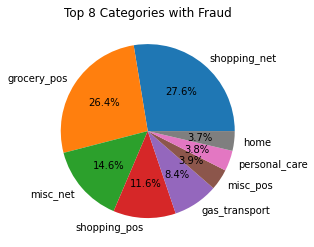

In [ ]:
category = df.groupby('category').sum()
category_fraud= category.is_fraud.nlargest(8)

plt.pie(category_fraud,labels=category_fraud.index, autopct='%1.1f%%')
plt.title("Top 8 Categories with Fraud")
plt.show()

The second variable we wanted to explore was where was all of this fraud occuring?

In this bar chart grouped by US state, we sorted each state by highest volume of fraud cases. From here its clear to us that from our sample data, New York has the highest amount of fraud and is followed by Pennyslvania and Texas. As such, we were to set up a headquarters, or the very least call centers, we would ideally want to put them in New York or the east coast where the timezones will be the same for our first set of target customers.

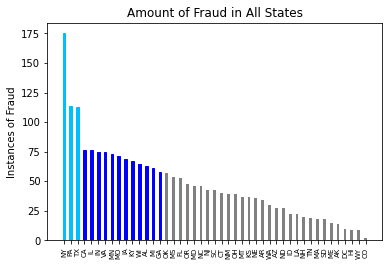

In [ ]:
basic_bar_df = df.groupby('state').sum()
states_sorted = basic_bar_df.sort_values(by='is_fraud',ascending=False)
state_top15=states_sorted.head(15)
all_state_fraud = plt.bar(states_sorted.index,states_sorted['is_fraud'], color = 'grey', width = .4)
plt.xticks(rotation=90)
plt.xticks(fontsize=7)
for i in range(0,15):
    all_state_fraud[i].set_color('blue')
for y in range(0,3):
  all_state_fraud[y].set_color('deepskyblue')
plt.ylabel("Instances of Fraud")
plt.title("Amount of Fraud in All States")
plt.show()

Now that we know to focus on New York, we want to find how big our market actually is, since our concern is cyber fraud. We found that New York has a lot of room to grow when it comes to cyber security. 48.7% of money lost was from online shoping and 21% was from miscellaneous net use. This means that nearly 70% of money lost in New York via fraud is committed online. That said, we hope to start our headquarters in New York so that we would be able to be close to our customers and provide them with our services as soon as possible.

In this pie chart, we took the sum of money lost in each category of fraud in New York only, and created a visualization out of it, again rounding to the nearest tenth for clarity.

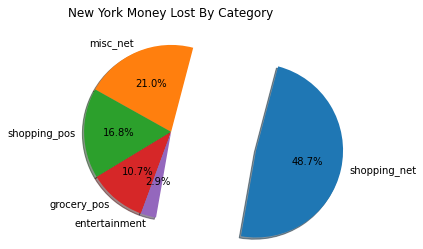

In [ ]:
NY_vis= df[df['state']=='NY']
NY_cat_vis=NY_vis.groupby('category').sum()
NY_cat_top5=NY_cat_vis.amt.nlargest(5)

plt.pie(NY_cat_top5,labels=NY_cat_top5.index,autopct='%1.1f%%',
       shadow=True,
       explode = NY_cat_top5.index=='shopping_net',
       startangle =260)
plt.title('New York Money Lost By Category')
plt.show()

Although we know without a doubt that we would focus our efforts on New York, we wanted to know where in New York specifically was fraud the most severe. We discovered that of all the cities in New York, Camden had the highest amount of fraud. This may be the city where we will choose to place our headquarters.

We created another bar plot to come to this conclusion, calculating for the sum of fraud cases in every city for New York only, and then sorting from greatest to least, and then displaying only the top 5 sufferers of fraud.

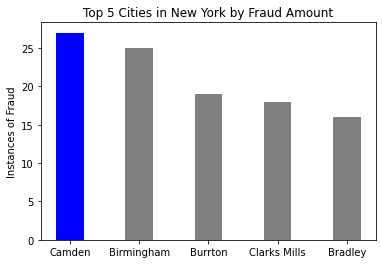

In [ ]:
NY= df[df['state']=='NY']
NY_data = df.groupby('city').sum()
NY_city_top_5 = NY_data.is_fraud.nlargest(5)

asdf=NY_data.sort_values(by='is_fraud',ascending=False)
top_5=asdf.head(5)

plt.bar(top_5.index,top_5.is_fraud,color = ['blue','grey','grey','grey','grey'], width = .4)
plt.title('Top 5 Cities in New York by Fraud Amount')
plt.ylabel("Instances of Fraud")
plt.show()

Now that we've narrowed down our data to knowing that we want to focus our efforts in New York and place our headquarters in Camden,we wanted to find our target demographic. After diving deeper into our data, we soon came to the realization that New Yorkers in the age range of 50-60 are overwhelmingly the most common victims. We now know with certainty that our target demographic will be a mature audience that frequently engages in online shopping and surfing the web.

To come to this realization, we grouped by the binned age groups that we manually created, and then sorted them by sum of fraud cases using a bar plot.

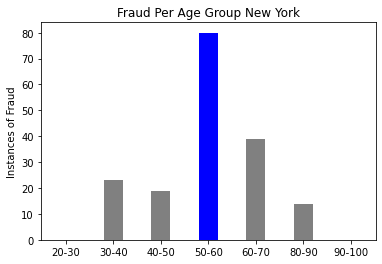

In [ ]:
NY= df[df['state']=='NY']
NY_age=NY.groupby('age_group').sum()
NY_age

plt.bar(NY_age.index, NY_age.is_fraud, color = ['grey','grey','grey','blue','grey','grey','grey'],width = .4)
plt.title("Fraud Per Age Group New York")
plt.ylabel("Instances of Fraud")
plt.show()

Finally, the last thing we wanted to try to visulize was seasonality with our data. Was fraud happening around holidays? or would they happen primarily around November where we black friday and cyber monday? We however found that the quantity of fraud peaked in July which we found interesting and worth noting. If we were to plan releasing promotions for our services, we would want to do this prior to July so that we would be able to protect the most customers if this trend proves to be yearly.

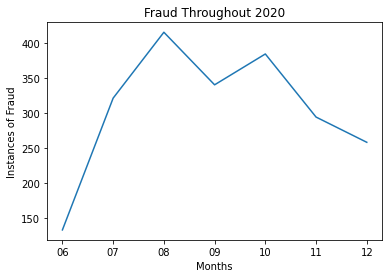

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_month'] = df['trans_date_trans_time'].dt.strftime('%m')
#naming months as their abbreviated names won't let me order them for some reason
#df['trans_month'] = df.strftime('%b')
df['trans_month']

date=df.groupby('trans_month').agg({'is_fraud':'sum'}).sort_values('trans_month')
date

plt.plot(date.index, date, linestyle ='-')
plt.title("Fraud Throughout 2020")
plt.ylabel("Instances of Fraud")
plt.xlabel("Months")
plt.show()



##**Recommendations**

#*Marketing Campaigns*#
We believe that raising awareness regarding cyber security in online shopping in a fashion that appeals to an older audience is the first step in reducing fraud cases. The obvious thing to do is advertise online, as that's where our target audience will be. Furthermore, New York is no stranger to billboards or digital screens, so advertising can be done very easily outside of a digital context as well.

#*Creating a Software*#
We plan to caution and protect our users by creating a widget/extension to be downloaded for a browser. Similar to how honey works, the goal is for the widget to be on in the background while our customers are browsing the internet. Once our customer encounters a website that has been flagged as "sketchy," they will be automatically notified and warned to not give any personal information away to credit card scalpers that may be waiting for them on the website.

#*Premium Service*#
Implementing toll-free customer support is also key for helping establish trust and ease the worries of people who fear getting scammed by others and could use some extra clarity from us. We would like to provide a service for incoming callers or emailers by answering any questions on the software and/or our company to assure them peace of mind.



#**Summary and Conclusions**

Ultimately, our goal as Fraud Fighters is to put a stop to cyber fraud. We needed to uncover the truth about where fraud was most virulent, who the victims were, and what needed to be done about it. We discovered that 42.2% of all fraud in the US is online, being by far the biggest piece of the pie. Then, we identified New York as being the state experiencing fraud the most. When New Yorkers lost money due to fraud, nearly 70% of the money was lost in an online endeavor. Then, we found that Camden was particularly vulnerable, experiencing the most fraud in all of New York. Finally, we recognized that people in the age range of 50-60 were by far the most common victims of fraud in New York. Thus, we knew that we had to tailor to a mature audience in focus our efforts in New York.

Per our recommendations of marketing campaigns to raise awareness regarding cyber security, creating a software to caution and protect our users, providing premium service to enable toll-free customer support, and cracking down on fraud personally by tracking and reporting the fraudulent websites, transactions, and fraudsters themselves, we believe that we will succeed in our vision. By our name Fraud Fighters, we will dedicate every fiber of our being to putting an end to cyber fraud and restore the integrity of online usage.

Challenges:
The insights that could be made from the data. We wish there could have been more variables to work like: "Was this transaction made from a mobile phone or desktop. Preparing the data for dates to do the line graph and the age portion was also challening. Luckily we figured out how to make the ages work, but for some reason ordering the months chronologically while leaving them in their abbreviated format was being tricky.

What could we have made better?
The dataset also included longitute and latitude coordinates that indicated what store the fraud happened at. We tried playing around with different python libraries to try and make a visualization of New York to show where the "hotspots" were but were unfortunately unsuccessfully. If possible we would have loved to add this visualization to our presentation and final report.



#**Bibliography**


anonymous. (2022). <i>fraud transactions dataset</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/4521194